<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/12_2_BatchNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

# fashion mnist로 비교해봅시다

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape, y_train.shape)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']     

epochs = 10

(60000, 28, 28) (60000,)


In [2]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [4]:
from tensorflow.keras import layers, models

conv2d_1 = models.Model(inputs=model.input, outputs=model.layers[0].output)
conv2d_out = conv2d_1.predict(x_train[[1]])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


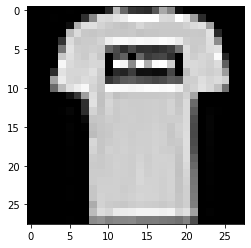

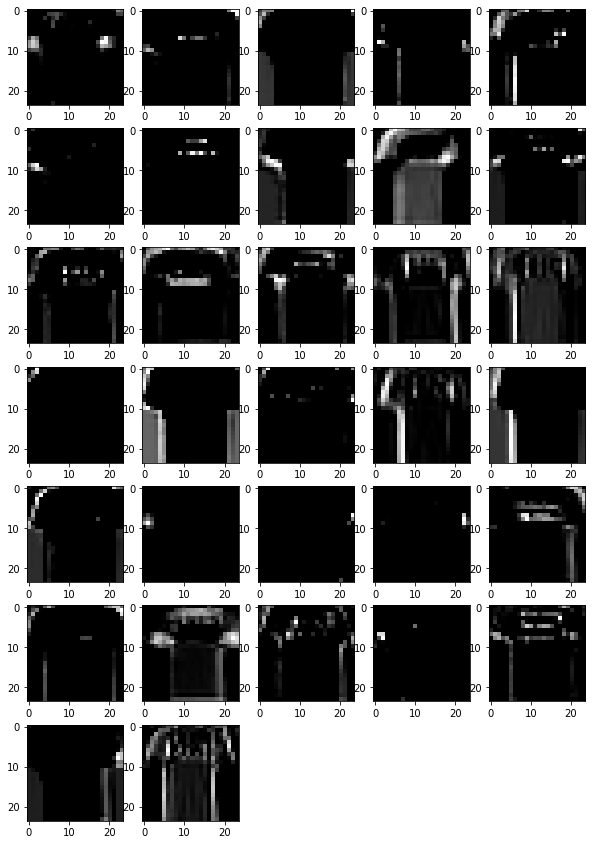

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1,:,:,0], cmap='gray')
fig = plt.figure(figsize=(10,15))

for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

In [6]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool2D(2,2))
model2.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPool2D(2,2))
model2.add(layers.Flatten())
model2.add(layers.Dense(1024, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history2 = model2.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


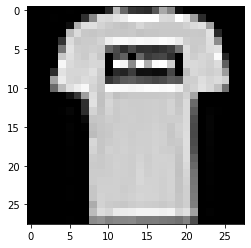

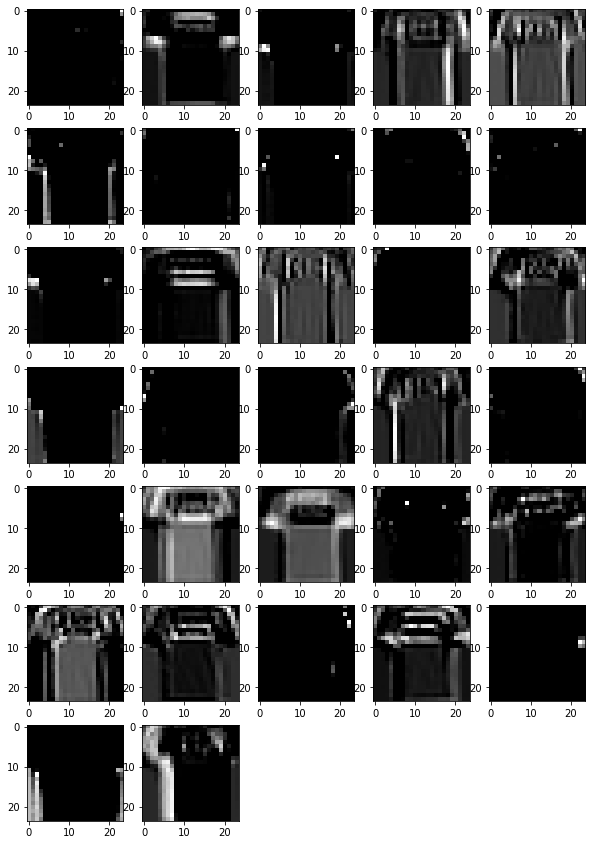

In [7]:
from tensorflow.keras import layers, models

conv2d_1 = models.Model(inputs=model2.input, outputs=model2.layers[1].output)
conv2d_out = conv2d_1.predict(x_train[[1]])

import matplotlib.pyplot as plt

plt.imshow(x_train[1,:,:,0], cmap='gray')
fig = plt.figure(figsize=(10,15))

for i in range(32):
    fig.add_subplot(7,5,i+1)
    plt.imshow(conv2d_out[0,:,:,i], cmap='gray')

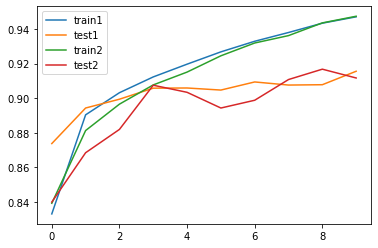

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.legend(['train1', 'test1','train2', 'test2'], loc='upper left')

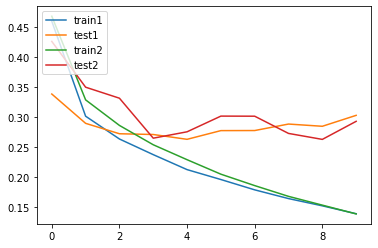

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['train1', 'test1','train2', 'test2'], loc='upper left')